# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **
This is a typical Classification problem because we are trying to separate (or classify) students who might need help from the ones who don't. Bascially, in a problem such as this, the end goal is to label each student (Y/1=needs help,  N/0=does not need help).

On the other hand, Regression problems are the ones which invovle predicting (or calculating) a continuous numeric output value based on a given set of input values. Example of such problem is: predicting the value of a house; given input parameters such as sqft, #bath, #bedrooms, lot size, year built, condition of the house etc.  We are not asked to calculate any such continuous numeric value for the students. 

Hence, this project is a supervised Classification learning problem.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [207]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# To display pd.DataFrames beautifully
from IPython.display import display, HTML

# visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline  


# helps in counting categorical data
from collections import Counter

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


Let us take a quick look at the data before we start answering any questions.

In [208]:
# Shape of the student_data dataframe is
print student_data.shape

# 395 rows 
# 31 columns

(395, 31)


In [209]:
# dataframe consists of these columns
print student_data.columns.values

# passed - label of the given dataset
# all other columns are features

['school' 'sex' 'age' 'address' 'famsize' 'Pstatus' 'Medu' 'Fedu' 'Mjob'
 'Fjob' 'reason' 'guardian' 'traveltime' 'studytime' 'failures' 'schoolsup'
 'famsup' 'paid' 'activities' 'nursery' 'higher' 'internet' 'romantic'
 'famrel' 'freetime' 'goout' 'Dalc' 'Walc' 'health' 'absences' 'passed']


In [210]:
# First few rows are
print student_data.head()

# dataset has mixture of Numeric and Categorical variables
# passed - is a categorical variable with Yes, No values. Ideally such fields should be converted into 
#          numeric field with 1/0 values, but let us see what the project requires ...

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   ...   internet romantic  famrel  freetime  goout Dalc Walc health absences  \
0  ...         no       no       4         3      4    1    1      3        6   
1  ...        yes       no       5         3      3    1    1      3        4   
2  ...        yes       no       4         3      2    2    3      3       10   
3  ...        yes      yes       3         2      2    1    1      5        2   
4  ...         no       no       4         3      2    1    2      5        4   

  passed  
0     no  
1     no  
2    yes  
3    yes  
4

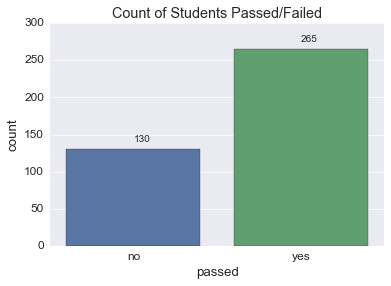

In [211]:
# Let us closely examine/visualize 'Passed' variable


# plot bar graph of the 'passed' variable
color = sns.color_palette("husl", n_colors=3, desat=0.75)
ax = sns.countplot(x="passed", data=student_data)
sns.plt.title('Count of Students Passed/Failed')

# following lines put respective counts on top of the bar
total = student_data.shape[0]
for p in ax.patches:
    x_pos = p.get_x() + (p.get_width() / 2)
    y_pos = p.get_height() + 10
    value = int(p.get_height())
    ax.text(x_pos, y_pos, value)

# 265/395 students passed
# 130/395 students failed

In [212]:
# TODO: Calculate number of students
# df.shape[0] gives total # of rows in dataframe, not including the header. 
# which is equal to # of examples or # of students in the dataset.
n_students = student_data.shape[0]

# TODO: Calculate number of features
# df.shape[1] gives total # of columns in dataframe.
# student_data has 31 columns (= 30 features + 1 label). 
# Hence subtracing 1 from shape[1]. 
n_features = student_data.shape[1] - 1   

# TODO: Calculate passing students
# filter dataset by 'passed' = 'yes' and count the result
n_passed = len(student_data[student_data.passed == 'yes'])

# TODO: Calculate failing students
# filter dataset by 'passed' = 'no' and count the result
n_failed = len(student_data[student_data.passed == 'no'])

# TODO: Calculate graduation rate
grad_rate = float(n_passed) / n_students * 100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [213]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:"
display(feature_cols)
print "Target column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nSample Features (Head):"
display(X_all.head())

print "\nSample Features (Tail):"
display(X_all.tail())

Feature columns:


['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

Target column: passed

Sample Features (Head):


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4



Sample Features (Tail):


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,5,4,11
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,3,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,3,4,5,0
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,yes,yes,no,3,2,3,3,3,5,5


### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [214]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [215]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state = 42, stratify=y_all)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **

All the given supervised learning models above, can be used for Classification problems such as one at hand. Three supervised learning models I've chosen to examine here are as follows:

1. RandomForestClassifier
2. Support Vector Machines
3. AdaBoostClassifier

Let us now closely examine each chosen model

*RandomForestClassifier* 

- *Usecase:* Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set. Random Forest Classifiers have been applied in the following noted fields:
 - Astronomy: filtering noise from Hubble Space Telescope images was reported recently. Decision trees have helped in star-galaxy classification, determining galaxy counts and discovering quasars in the Second Palomar Sky Survey
 - Physics: Decision trees have been used for the detection of physical particles at The Large Hadron Collider, CERN
 - Medicine: Use for decision trees can be found in diagnosis, cardiology, psychiatry, gastroenterology, for detecting microcalcifications in mammography, to analyze Sudden Infant Death (SID) syndrome and for diagnosing thyroid disorders.
 - Source: [Center for Bioinformatics and Computational Biology](http://www.cbcb.umd.edu/~salzberg/docs/murthy_thesis/survey/node32.html)
 
- *Strength:*
 - The main advantage is that, because of how they are constructed (using bagging or boosting) these algorithms handle very well high dimensional spaces as well as large number of training examples.
 - Robust to overfitting because it uses Ensemble of tree classifiers and averages each results.
 - Tree Ensembles, because they are nothing more than a bunch of Decision Trees combined, can handle categorial data very well.
 - Don't have to worry about tuning a bunch of parameters like with SVMs.

- *Weakness:*
 - Results of learning are incomprehensible. Compared to a single decision tree, or to a set of rules, they don't give you a lot of insight.
 - They are hard to make incremental changes. It can be done, but there's no natural algorithm to do so (in the same way, for instance, that it's easy to tweak the parameters of naive bayes after we add an instance, or to add a new instance to a nearest neighbour classifier).

- *Why here:* RandomForestClassifiers is considered de facto classifiers for problem such as ours because of its high classification scores. It will work well for our problem of classifying students, where we just want to put students in two categories. RFC is very robust and accurate.

*Support Vector Machines (SVC)*

- *Usecase:* Support vector machines (SVMs,  are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked for belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples into one category or the other, making it a non-probabilistic binary linear classifier. An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall on. SVMs can be used to solve various real world problems of Uncertainty in Knowledge-Based Systems:
 - Hand-written characters can be recognized using SVM.
 - SVMs have been used to classify proteins with up to 90% of the compounds classified correctly. 
 - SVMs are helpful in text and hypertext categorization as their application can significantly reduce the need for labeled training instances in both the standard inductive and transductive settings.
 - Source: [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine#Applications)

- *Strength:*
 - Effective in high dimensional spaces.
 - Still effective in cases where number of dimensions is greater than the number of samples.
 - Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
 - Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
 
- *Weakness:*
 - If the number of features is much greater than the number of samples, the method is likely to give poor performances.
 - SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.
 - Picking/finding the right kernel can be a challenge.
 - Results/output are incomprehensible.
 - No standardized way for dealing with multi-class problems; fundamentally a binary classifier

- *Why here:* SVC will work perfectly well for our problem of classifying students. We don't need to know exact probability of a student falling in each category. It is enough to know which category (needs-help vs does-not-need-help) a student belongs to. SVC is simple and fast.

*AdaBoostClassifier*

- *Usecase:* AdaBoost, short for "Adaptive Boosting", can be used in conjunction with many other types of learning algorithms to improve their performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers. AdaBoost is sensitive to noisy data and outliers. In some problems it can be less susceptible to the overfitting problem than other learning algorithms. The individual learners can be weak, but as long as the performance of each one is slightly better than random guessing (e.g., their error rate is smaller than 0.5 for binary classification), the final model can be proven to converge to a strong learner.
 - Face Detection in Color Images Using AdaBoost Algorithm Based on Skin Color Information
 - Source: [IEEE](http://ieeexplore.ieee.org/document/4470408/)

- *Strength:*
 - Natural handling of data of mixed type (= heterogeneous features)
 - Predictive power
 - Robustness to outliers in output space (via robust loss functions

- *Weakness:*
 - Scalability, due to the sequential nature of boosting it can hardly be parallelized.

- *Why here:* While every learning algorithm will tend to suit some problem types better than others, and will typically have many different parameters and configurations to be adjusted before achieving optimal performance on a dataset, AdaBoost (with decision trees as the weak learners) is often referred to as the best out-of-the-box classifier.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [223]:
# NOTE: change logs:

# - I've commented all the print statements in the provided function templates, and replaced them with a statistics 
#   collection design. This should facilitate analysis and reporting later.
# - I've changed template functions to return computed value(s), rather than simply print values to console

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    # print "Trained model in {:.4f} seconds".format(end - start)

    return (end - start)
    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    # print "Made predictions in {:.4f} seconds.".format(end - start)
        
    return f1_score(target.values, y_pred, pos_label='yes'), (end - start)

rows = [] # for reports
def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    # print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    training_time = train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    # print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    # print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))
    
    f1_score_train, prediction_time_train = predict_labels(clf, X_train, y_train)   
    f1_score_test, prediction_time_test = predict_labels(clf, X_test, y_test)
       
    # Collect data for visualization and reporting
    d = {
        'Classifier': clf.__class__.__name__,
        'Training Set Size': len(X_train),
        'Training Time': float("{:.4f}".format(training_time)),
        'Prediction Time (train)' : float("{:.4f}".format(prediction_time_train)),
        'Prediction Time (test)' : float("{:.4f}".format(prediction_time_test)),
        'F1 Score (train)': float("{:.4f}".format(f1_score_train)),
        'F1 Score (test)': float("{:.4f}".format(f1_score_test))
        }
    
    rows.append(pd.Series(d))

    return f1_score_train, f1_score_test

# This is a new function added by me
def gen_report(show_table=True):

    report_data = pd.DataFrame(rows)
    
    columns = ['Classifier', 'Training Set Size', 'Training Time','Prediction Time (test)',
              'F1 Score (train)', 'F1 Score (test)']
    
    if show_table:
        display(report_data[columns])
    
    # print best training time
    print "\nSorted Average Training Time by Classifier:"
    columns = ['Classifier', 'Training Time']
    gb = report_data.groupby(['Classifier'])
    average_training_time = gb['Training Time'].mean()
    average_training_time = pd.DataFrame(average_training_time.to_dict().items(),  columns=columns)
    average_training_time.sort_values(['Training Time'], ascending = True, inplace = True)
    display(average_training_time)
    
    # print best prediction time (test)
    print "\nSorted Average Prediction Time by Classifier:"
    columns = ['Classifier', 'Prediction Time (test)']
    gb = report_data.groupby(['Classifier'])
    average_testing_time = gb['Prediction Time (test)'].mean()
    average_testing_time = pd.DataFrame(average_testing_time.to_dict().items(),  columns=columns)
    average_testing_time.sort_values(['Prediction Time (test)'], ascending = True, inplace = True)
    display(average_testing_time)
    
    # plot graph of the scores
    # sns.set(style="whitegrid")
    paper_rc = {'lines.linewidth': 1, 'lines.markersize': 1}                  
    sns.set_context("paper", font_scale=1.5, rc = paper_rc)

    sns.factorplot(x="Training Set Size", y="F1 Score (test)", 
                   hue="Classifier", size=5, aspect=2, kind="point", data=report_data)
    # sns.plt.title('Test F1 Scores of various Classifiers')

def clear_report():
    del rows[:]

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [224]:
# TODO: Import the three supervised learning models from sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the three models
clf_A = RandomForestClassifier(random_state = 42)
clf_B = SVC(random_state = 42)
clf_C = AdaBoostClassifier(random_state = 42)

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# X_train, X_test, y_train, y_test
models = [eval("clf_" + chr(i)) for i in range(ord('A'), ord('D'))]
set_sizes = range(100, 400, 100)

clear_report()

for clf in models:
    for size in set_sizes:
        train_predict(clf, X_train[0:size], y_train[0:size], X_test, y_test)

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

,Classifier,Training Set Size,Training Time,Prediction Time (test),F1 Score (train),F1 Score (test)
0,RandomForestClassifier,100,0.0388,0.0012,0.9924,0.7368
1,RandomForestClassifier,200,0.0292,0.0010,0.9885,0.6822
2,RandomForestClassifier,300,0.0303,0.0010,0.9975,0.7132
3,SVC,100,0.0011,0.0006,0.8354,0.8025
4,SVC,200,0.0033,0.0011,0.8431,0.8105
5,SVC,300,0.0054,0.0013,0.8664,0.8052
6,AdaBoostClassifier,100,0.1103,0.0052,0.9778,0.6880
7,AdaBoostClassifier,200,0.1202,0.0051,0.8905,0.7445
8,AdaBoostClassifier,300,0.1188,0.0051,0.8565,0.7328



Sorted Average Training Time by Classifier:


,Classifier,Training Time
1,SVC,0.003267
2,RandomForestClassifier,0.032767
0,AdaBoostClassifier,0.116433



Sorted Average Prediction Time by Classifier:


,Classifier,Prediction Time (test)
1,SVC,0.001000
2,RandomForestClassifier,0.001067
0,AdaBoostClassifier,0.005133


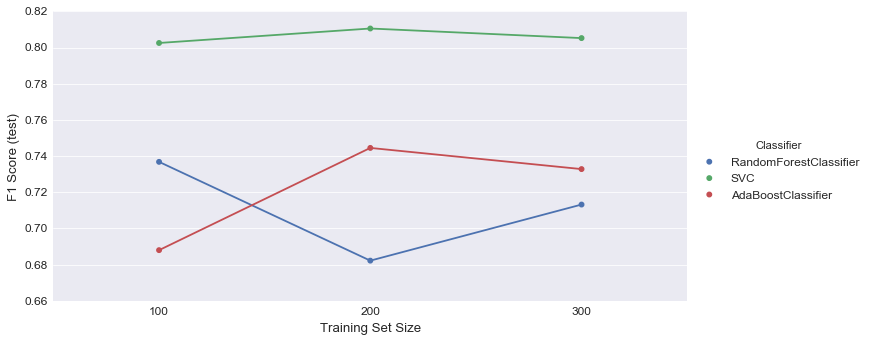

In [225]:
gen_report()

## Bonus: Implementation: Model Performance Metrics

In this section we will try out all the classification algorithms supported by sklearn to find out which one has the best score:


- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression



Sorted Average Training Time by Classifier:


,Classifier,Training Time
10,NearestCentroid,0.000433
2,KNeighborsClassifier,0.000600
8,SGDClassifier,0.000667
6,DecisionTreeClassifier,0.001200
3,GaussianNB,0.001333
0,LogisticRegression,0.001800
9,SVC,0.003700
1,ExtraTreesClassifier,0.024967
7,RandomForestClassifier,0.027100
5,BaggingClassifier,0.029000



Sorted Average Prediction Time by Classifier:


,Classifier,Prediction Time (test)
0,LogisticRegression,0.000200
8,SGDClassifier,0.000200
6,DecisionTreeClassifier,0.000233
10,NearestCentroid,0.000267
11,GradientBoostingClassifier,0.000400
3,GaussianNB,0.000433
7,RandomForestClassifier,0.001067
1,ExtraTreesClassifier,0.001133
9,SVC,0.001167
5,BaggingClassifier,0.001233


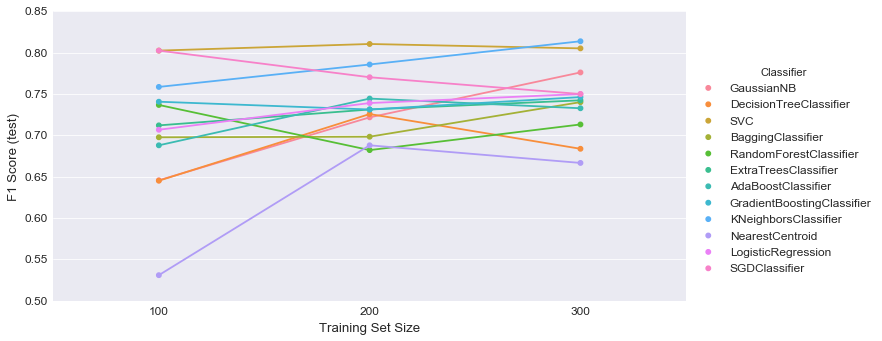

In [226]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# TODO: Initialize the various models
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(random_state = 42)
clf_C = SVC(random_state = 42)
clf_D = BaggingClassifier(random_state = 42)
clf_E = RandomForestClassifier(random_state = 42)
clf_F = ExtraTreesClassifier(random_state = 42)
clf_G = AdaBoostClassifier(random_state = 42)
clf_H = GradientBoostingClassifier(random_state = 42)
clf_I = KNeighborsClassifier()
clf_J = NearestCentroid()
clf_K = LogisticRegression(random_state = 42)
clf_L = SGDClassifier(random_state = 42)
# clf_M = RadiusNeighborsClassifier() - ValueError: No neighbors found for test samples

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# X_train, X_test, y_train, y_test
models = [eval("clf_" + chr(i)) for i in range(ord('A'), ord('M'))]
set_sizes = range(100, 400, 100)

clear_report()

for clf in models:
    for size in set_sizes:
        train_predict(clf, X_train[0:size], y_train[0:size], X_test, y_test)

# display graph report
gen_report(show_table=False)

From our untuned model results, it looks like following three Classifiers flared well:

- SVC 
- KNeighborsClassifier
- GaussianNB

*Note:*

- Best performing classifiers here are different from our initial choice of algorithms for this student dataset. 
- Feature scaling is usually appropriate for SVC, but we are not doing in this project.

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

Based on our experiment results, we recommend SVC (Support Vector Classifier) model to the board of supervisors to identify students who can use some timely help. SVC has the best F1 score amongst the 12 classifiers that we tried above. It also has the best training and prediction timing - earning triple golden stars. There are few other classifiers which have better timing, but their score is lower. SVC is in a sweet spot, which has both good score and good training, prediction timing.

The main advantage of SVC is that, because of how they are constructed these algorithms handle very well high dimensional spaces as well as large number of training examples. It uses subset of training points in the decision function (called support vectors), so it is also memory efficient. It is a very versatile classifier because different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels. 

Hence SVC is highly recommended to the school management. 

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

A Support Vector Machine (SVM) is a way that can be used to classify things, such as in our current project - where we want to classify given students into two groups: 
- students who need help
- students who do not need help

SVMs are based on the idea of finding a line of separation that best divides a dataset into two classes. Intuitively, the further from the line of separation our data points lie, the more confident we are that they have been correctly classified. We therefore want our data points to be as far away from the line of separation as possible, while still being on the correct side of it. So when new data point is added, whatever side of the line it lands will decide the class that we assign to it.

How do we find the line of separation?

The distance between the line of separation and the nearest data point from either set is known as the margin. The goal is to choose a line with the greatest possible margin between the line and any point within the data set, giving a greater chance of new data being classified correctly.

![](http://blog.aylien.com/wp-content/uploads/2016/06/tumblr_inline_o9aa9nH3WQ1u37g00_540.png)

There are software programs, such as [scikit-learn](http://scikit-learn.org/stable/index.html) that will do all the complex math for you. Software program runs in two stages. In stage-1 it takes some samples of student data with correct answers provided (such as following table). Then internally it figures out which set of grades pushes a student over to either side of the imaginary line of separation. For example: by looking at the sample data, software might decide that grades C, D, and F is the cutoff for students who need help.  

| Name   | Grade English | Grade Math | Grade Science | Needs Help? |
|--------|---------------|------------|---------------|-------------|
| Fred   | C             | F          | D             | Yes         |
| Jim    | A             | A          | B             | No          |
| Kelly  | D             | D          | F             | Yes         |
|        |               |            |               |             |
| Keri   | D             | D          | F             | ?           |

Then in stage-2 when we ask software with a new student, say Keri (above), software will output "needs help = yes", because Keri has D's and F. 

SVM can also be used to separate more than two types of things. The accuracy of software depends on the quality of the sample data that we provide to it in stage-1. Such sample data should have ample information in it to decide which kinds of grades cause students to fall in "need help" bucket.

There you have it, a very high level introduction to Support Vector Machines.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [227]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune
parameters = { 
    'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
    'RandomForestClassifier': { 'n_estimators': [16, 32], 
                                'criterion': ['gini', 'entropy'],
                                'class_weight': [None, 'balanced', 'balanced_subsample']
                              },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32], 'learning_rate': [0.1, 0.5, 1] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'BaggingClassifier': { 'n_estimators': [16, 32] },
    'DecisionTreeClassifier': { 'criterion': ['gini', 'entropy'], 
                               'splitter': ['best', 'random'], 
                               'class_weight': [None, 'balanced'] },
    'KNeighborsClassifier': { 'n_neighbors' : [2, 3, 5] },
    'NearestCentroid': { 'metric' : ['euclidean', 'manhattan'] },
#   'RadiusNeighborsClassifier': { 'weights': ['uniform', 'distance']}, ***
    'SGDClassifier': { 'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']},
    'GaussianNB': {},
    'LogisticRegression' : { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001], 'class_weight': [None, 'balanced']},
        {'kernel': ['poly'], 'C': [1, 10], 'gamma': [0.001, 0.0001], 'degree': [1, 2, 3, 10], 'class_weight': [None, 'balanced']}
    ]
}        
            
# TODO: Initialize the classifier
models = { 
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state = 42),
    'RandomForestClassifier': RandomForestClassifier(random_state = 42),
    'AdaBoostClassifier': AdaBoostClassifier(random_state = 42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state = 42),
    'BaggingClassifier': BaggingClassifier(random_state = 42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state = 42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'NearestCentroid': NearestCentroid(),
#    RadiusNeighborsClassifier': RadiusNeighborsClassifier(), ***
    'SGDClassifier': SGDClassifier(random_state = 42),
    'GaussianNB': GaussianNB(),
    'LogisticRegression' : LogisticRegression(random_state = 42),
    'SVC': SVC(random_state = 42)
}

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label = "yes")

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
# TODO: Fit the grid search object to the training data and find the optimal parameters

gs_rows = [] # for report
for key in models:
    print("Running GridSearchCV for %s." % key)
    model = models[key]
    params = parameters[key]
    gs = GridSearchCV(model, param_grid = params, scoring = f1_scorer)
    gs = gs.fit(X_train, y_train)
    
    # Get the estimator
    best = gs.best_estimator_

    # Report the final F1 score for training and testing after parameter tuning
    training_score, testing_score = train_predict(model, X_train, y_train, X_test, y_test)
    tuned_training_score, _ = predict_labels(best, X_train, y_train)
    tuned_testing_score, _ = predict_labels(best, X_test, y_test)
    testing_score_gain = tuned_testing_score - testing_score
    
    
    # Collect data for visualization and reporting
    d = {
        'Classifier': key,
        'Training F1 Score': float("{:.4f}".format(training_score)),
        'Testing F1 Score': float("{:.4f}".format(testing_score)),
        'Training F1 Score (Tuned)': float("{:.4f}".format(tuned_testing_score)),
        'Testing F1 Score (Tuned)': float("{:.4f}".format(tuned_testing_score)),
        'Gain': float("{:.4f}".format(testing_score_gain)),
        'Sorted Gain %': float("{:.1f}".format((testing_score_gain / testing_score) * 100))
        }
    
    gs_rows.append(pd.Series(d))
    
# df of collected scores
report_data = pd.DataFrame(gs_rows)
report_data.sort_values(["Sorted Gain %"], ascending = False, inplace = True)

# display subset of the df
report_data[['Classifier', 'Testing F1 Score', 'Testing F1 Score (Tuned)', 'Gain', 'Sorted Gain %']]

Running GridSearchCV for ExtraTreesClassifier.
Running GridSearchCV for AdaBoostClassifier.
Running GridSearchCV for BaggingClassifier.
Running GridSearchCV for SVC.
Running GridSearchCV for SGDClassifier.
Running GridSearchCV for DecisionTreeClassifier.
Running GridSearchCV for NearestCentroid.
Running GridSearchCV for LogisticRegression.
Running GridSearchCV for RandomForestClassifier.
Running GridSearchCV for GaussianNB.
Running GridSearchCV for KNeighborsClassifier.
Running GridSearchCV for GradientBoostingClassifier.


,Classifier,Testing F1 Score,Testing F1 Score (Tuned),Gain,Sorted Gain %
8,RandomForestClassifier,0.7132,0.8000,0.0868,12.2
0,ExtraTreesClassifier,0.7424,0.7973,0.0549,7.4
4,SGDClassifier,0.7500,0.8050,0.0550,7.3
7,LogisticRegression,0.7500,0.8000,0.0500,6.7
2,BaggingClassifier,0.7402,0.7770,0.0368,5.0
1,AdaBoostClassifier,0.7328,0.7660,0.0331,4.5
5,DecisionTreeClassifier,0.6838,0.6992,0.0154,2.3
10,KNeighborsClassifier,0.8138,0.8143,0.0005,0.1
6,NearestCentroid,0.6667,0.6667,0.0000,0.0
9,GaussianNB,0.7761,0.7761,0.0000,0.0


# Additional notes
1. RadiusNeighborsClassifier - didn't work for this dataset. Algorithm could not find any reasonable radius to work with.

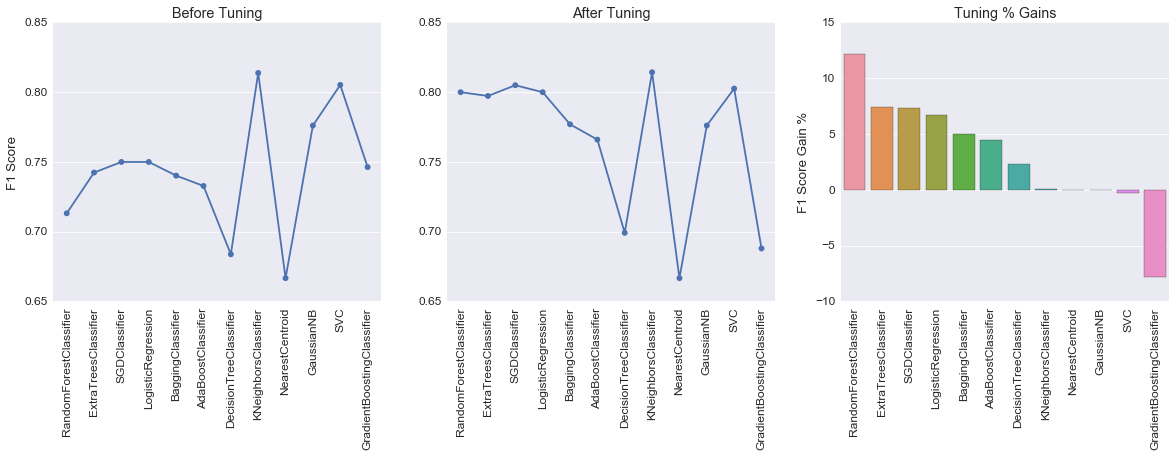

In [228]:
# plot graphs of the scores to visualize 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# before tuning
sns.pointplot(x="Classifier", y="Testing F1 Score", data=report_data, ax=ax1)
ax1.set(xlabel="", ylabel="F1 Score", title='Before Tuning')
ax1.set_xticklabels(ax1.xaxis.get_ticklabels(), rotation=90)

# after tuning
sns.pointplot(x="Classifier", y="Testing F1 Score (Tuned)", data=report_data, ax=ax2)
ax2.set(xlabel="", ylabel="", title='After Tuning')
ax2.set_xticklabels(ax2.xaxis.get_ticklabels(), rotation=90)

# gain
sns.barplot(x="Classifier", y="Sorted Gain %", data=report_data, ax=ax3)
ax3.set(xlabel="", ylabel="F1 Score Gain %", title='Tuning % Gains')
ax3.set_xticklabels(ax3.xaxis.get_ticklabels(), rotation=90)


In [229]:
# before tuning
max_before_idx = report_data['Testing F1 Score'].idxmax()
row = report_data.loc[max_before_idx]
print "Before tuning {} had the best F1 score of {}".format(row['Classifier'], row['Testing F1 Score'])

# after tuning
max_after_idx = report_data['Testing F1 Score (Tuned)'].idxmax()
row = report_data.loc[max_after_idx]
print "After tuning {} has the best F1 score of {}".format(row['Classifier'], row['Testing F1 Score (Tuned)'])

# print stats
df = report_data.loc[[max_before_idx, max_after_idx]]
df.loc[:, 'Phase'] = ['Before Tuning', 'After Tuning']
columns = ['Phase', "Classifier", "Training F1 Score", "Training F1 Score (Tuned)", "Testing F1 Score", "Testing F1 Score (Tuned)"]
display(df[columns])

Before tuning KNeighborsClassifier had the best F1 score of 0.8138
After tuning KNeighborsClassifier has the best F1 score of 0.8143


,Phase,Classifier,Training F1 Score,Training F1 Score (Tuned),Testing F1 Score,Testing F1 Score (Tuned)
10,Before Tuning,KNeighborsClassifier,0.8539,0.8143,0.8138,0.8143
10,After Tuning,KNeighborsClassifier,0.8539,0.8143,0.8138,0.8143


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

Our final winning model is **KNeighborsClassifier**. Its tuned F1 score for training and testing are 0.8143 and 0.8143 respectively. Corresponding untuned scores were 0.8539 for training and 0.8138 for testing - which is 0.1% gain in testing scores after tuning. This shows that this model was very robust to begin with and did not need further tuning. It has quite an impressive - **81.43%** classification accuracy.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.